## Maestría en Inteligencia Artificial Aplicada

### PROYECTO INTEGRADOR

MODELO ML PREDICCION DE ABANDONO DE TARJETA DE CREDITO

Avance 2 INGENIERIA DE CARACTERISTICAS

Equipo 45

Felipe de Jesús Gastélum Lizárraga - A01114918

Jonathan Montaña Vásquez - A01793920

Irvin Gómez Esquivel - A00361034

12/5/2024

### Introducción

El presente notebook contiene la ingeniería de características.

Haremos transformación de datos, utilizando one hot encondding, además de transformación de datos categóricos para convertirlos a ordinales.

También haremos un análisis de Componentes Principales (PCA)

### Preparación

In [2]:
# librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from io import BytesIO

#Librerias de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

import os
import pandas as pd
from google.colab import drive

### Carga del dataset

In [3]:
#Establecer coneccion con drive para poder cargar el arhivo de la base de datos
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Importar base de datos

import requests, zipfile
from io import *

url='https://drive.google.com/file/d/1g7GJ6JYnPkTc4G7WGrT3ZvMAl9nPsw_J/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

req = requests.get(url)
print('Downloading Completed')





# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/sample_data/AbandonoTarjeta')
df = pd.read_csv("/content/sample_data/AbandonoTarjeta/BankChurners.csv",sep=',')

### Estructura de los datos

In [5]:
#Vista General de Columnas y Primeros datos
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
#Información Estadistica General
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
#Verificar si hay columnas con valores nulos
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Con lo anterior, podemos observar que el dataset no tiene valores nulos

### Análisis de datos categóricos



#### Identificación de valores categóricos

Ahora buscamos los valores categóricos que luego convertiremos a valores numéricos

In [8]:
print("Gender")
print(df["Gender"].unique())
print("Education Level")
print(df["Education_Level"].unique())
print("Income Category")
print(df["Income_Category"].unique())
print("Marital Status")
print(df["Marital_Status"].unique())
print("Card Category")
print(df["Card_Category"].unique())

Gender
['M' 'F']
Education Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Income Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Marital Status
['Married' 'Single' 'Unknown' 'Divorced']
Card Category
['Blue' 'Gold' 'Silver' 'Platinum']


Observamos que tanto en Education Level, Income Category y Martial Status tenemos rows de Unknown, vamos a revisar cuantos registros tenemos de cada uno para saber si los incluimos en la transformación o si mejor los eliminamos

### Preprocesamiento

#### Conteo de valores desconocidos

In [9]:
df[df.Education_Level=="Unknown"]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.999880
11,710821833,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,...,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174,0.000198,0.999800
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,4234.0,972,3262.0,1.707,1348,27,1.700,0.230,0.000063,0.999940
17,753327333,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,...,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095,0.000150,0.999850
23,811604133,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,...,2492.0,1560,932.0,0.573,1126,23,0.353,0.626,0.000207,0.999790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,712296408,Existing Customer,36,F,3,Unknown,Married,$40K - $60K,Blue,22,...,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175,0.000345,0.999650
10094,716123283,Existing Customer,59,M,1,Unknown,Single,$60K - $80K,Blue,48,...,7288.0,0,7288.0,0.640,14873,120,0.714,0.000,0.000057,0.999940
10095,789023508,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,...,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032,0.000106,0.999890
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,9959.0,952,9007.0,0.825,10310,63,1.100,0.096,0.998130,0.001874


Hay 1519 rows con Education Level = unknown, lo que quiere decir que nos conviene más mantenerlos o perderemos un gran porcentaje de registros.

Vamos a revisar ahora Income Category

In [10]:
df[df.Income_Category=="Unknown"]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
19,709327383,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,...,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080,0.000055,0.999940
28,718813833,Existing Customer,44,F,3,Uneducated,Single,Unknown,Blue,34,...,10100.0,0,10100.0,0.525,1052,18,1.571,0.000,0.000121,0.999880
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.997800,0.002197
44,720572508,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,...,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209,0.000317,0.999680
58,711427458,Existing Customer,44,F,5,Graduate,Married,Unknown,Blue,35,...,6273.0,978,5295.0,2.275,1359,25,1.083,0.156,0.000057,0.999940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,711149133,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,...,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575,0.993300,0.006700
10040,714677583,Attrited Customer,50,F,3,Doctorate,Single,Unknown,Blue,36,...,5173.0,0,5173.0,0.912,8757,68,0.789,0.000,0.997800,0.002196
10083,718170033,Existing Customer,42,F,4,Uneducated,Married,Unknown,Blue,23,...,8348.0,0,8348.0,0.695,15905,111,0.708,0.000,0.000059,0.999940
10092,713437008,Attrited Customer,40,F,3,Graduate,Married,Unknown,Blue,25,...,6888.0,1878,5010.0,1.059,9038,64,0.829,0.273,0.994990,0.005010


También son más de 1000 registros, por lo que será mejor conservarla.

Ahora veamos Martial Status

In [11]:
df[df.Marital_Status=="Unknown"]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.999910
10,708790833,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,...,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217,0.000191,0.999810
13,816082233,Existing Customer,35,M,3,Graduate,Unknown,$60K - $80K,Blue,30,...,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195,0.000096,0.999900
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,4234.0,972,3262.0,1.707,1348,27,1.700,0.230,0.000063,0.999940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,747551658,Existing Customer,47,M,3,High School,Unknown,$80K - $120K,Silver,40,...,34516.0,1371,33145.0,0.691,15930,123,0.836,0.040,0.000164,0.999840
10100,719848008,Existing Customer,39,M,2,Graduate,Unknown,$60K - $80K,Silver,36,...,29808.0,0,29808.0,0.669,16098,128,0.684,0.000,0.000103,0.999900
10101,718372458,Existing Customer,42,M,2,Graduate,Unknown,$40K - $60K,Blue,30,...,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461,0.000565,0.999440
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,9959.0,952,9007.0,0.825,10310,63,1.100,0.096,0.998130,0.001874


Tenemos 749 Rows, los suficientes como para decidir no borrarlos

#### Transformación de datos categóricos a numéricos

Para Gender vamos a usar One Hot Encoding y remover la columna original, terminaremos con 2 columnas Gender_F y Gender_M

##### One Hot Encoding

In [12]:
df_gender = pd.get_dummies(df['Gender'], prefix="Gender", dtype=int)
df = pd.concat([df, df_gender], axis=1).reindex(df.index)
df.drop('Gender', axis=1, inplace=True)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F,Gender_M
0,768805383,Existing Customer,45,3,High School,Married,$60K - $80K,Blue,39,5,...,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,0,1
1,818770008,Existing Customer,49,5,Graduate,Single,Less than $40K,Blue,44,6,...,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,1,0
2,713982108,Existing Customer,51,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,0,1
3,769911858,Existing Customer,40,4,High School,Unknown,Less than $40K,Blue,34,3,...,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,1,0
4,709106358,Existing Customer,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,2,Graduate,Single,$40K - $60K,Blue,40,3,...,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,0,1
10123,710638233,Attrited Customer,41,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,0,1
10124,716506083,Attrited Customer,44,1,High School,Married,Less than $40K,Blue,36,5,...,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,1,0
10125,717406983,Attrited Customer,30,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,0,1


Realmente no necesitamos las 2 columnas Gender_F y Gender_M pues se asume que Gender_F = 0 en realidad es igual a Gender_M = 1, vamos a remover la columna Gender_M

In [13]:
df.drop('Gender_M', axis=1, inplace=True)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
0,768805383,Existing Customer,45,3,High School,Married,$60K - $80K,Blue,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,0
1,818770008,Existing Customer,49,5,Graduate,Single,Less than $40K,Blue,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,1
2,713982108,Existing Customer,51,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,0
3,769911858,Existing Customer,40,4,High School,Unknown,Less than $40K,Blue,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,1
4,709106358,Existing Customer,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,2,Graduate,Single,$40K - $60K,Blue,40,3,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,0
10123,710638233,Attrited Customer,41,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,0
10124,716506083,Attrited Customer,44,1,High School,Married,Less than $40K,Blue,36,5,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,1
10125,717406983,Attrited Customer,30,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,0


##### Codificación Ordinal

Para Education Level vamos a tomar los siguientes valores

'Unknown' = 0
'Uneducated' = 1
'High School' = 2
'College' = 3
'Graduate' = 4
'Post-Graduate' = 5
'Doctorate' = 6

Esta variable también es conveniente transformarla a ordinal, donde los números más bajos representan menos preparación académica y los números más altos representan mayor preparación académica.

In [14]:
df['Education_Level'] = df['Education_Level'].replace({'Unknown' : 0, 'Uneducated' : 1, 'High School' : 2, 'College' : 3, 'Graduate': 4, 'Post-Graduate' : 5, 'Doctorate' : 6})
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,2.601955,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,0.529081
std,3.690378e+07,8.016814,1.298908,1.700417,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,0.499178
min,7.080821e+08,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000
25%,7.130368e+08,41.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,0.000000
50%,7.179264e+08,46.000000,2.000000,3.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,1.000000
75%,7.731435e+08,52.000000,3.000000,4.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,1.000000
max,8.283431e+08,73.000000,5.000000,6.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,1.000000


Para Income category, vamos a utilizar los siguientes valores
'Unknown' = 0

'Less than $40K' = 1

'$40K - $60K' = 2

'$60K - $80K' = 3  

'$80K - $120K' = 4  

'$120K +' = 5

En este caso, estamos definiendo que la variable se puede convertir a ordinal definida por el nivel de ingresos a nivel más alto, número ordinal más grande.


In [15]:
df['Income_Category'] = df['Income_Category'].replace({'Unknown' : 0, 'Less than $40K' : 1, '$40K - $60K' : 2, '$60K - $80K' : 3, '$80K - $120K': 4, '$120K +' : 5})
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,2.601955,2.085711,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,0.529081
std,3.690378e+07,8.016814,1.298908,1.700417,1.474639,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,0.499178
min,7.080821e+08,26.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000
25%,7.130368e+08,41.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,0.000000
50%,7.179264e+08,46.000000,2.000000,3.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,1.000000
75%,7.731435e+08,52.000000,3.000000,4.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,1.000000
max,8.283431e+08,73.000000,5.000000,6.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,1.000000


Vamos a convertir Marital Status a Ordinal también, estuvimos debatiendo si debería ser OneHotEncoding o no, pero al parecer podemos establecer el siguiente orden
'Unknown' = 0
'Single' = 1
'Married' = 2
'Divorced' = 3

Lo hacemos de manera ordinal porque establecemos que hay un proceso de Soltero -> Casado -> Divorciado

In [16]:
df['Marital_Status'] = df['Marital_Status'].replace({'Unknown' : 0, 'Single' : 1, 'Married' : 2, 'Divorced' : 3})
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,2.601955,1.536585,2.085711,35.928409,3.812580,2.341167,2.455317,...,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,0.529081
std,3.690378e+07,8.016814,1.298908,1.700417,0.737808,1.474639,7.986416,1.554408,1.010622,1.106225,...,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,0.499178
min,7.080821e+08,26.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000
25%,7.130368e+08,41.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,...,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,0.000000
50%,7.179264e+08,46.000000,2.000000,3.000000,2.000000,2.000000,36.000000,4.000000,2.000000,2.000000,...,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,1.000000
75%,7.731435e+08,52.000000,3.000000,4.000000,2.000000,3.000000,40.000000,5.000000,3.000000,3.000000,...,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,1.000000
max,8.283431e+08,73.000000,5.000000,6.000000,3.000000,5.000000,56.000000,6.000000,6.000000,6.000000,...,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,1.000000


Card Category es otra que también podemos convertir a Ordinal de la siguiente manera
'Blue' = 1
'Silver' = 2
'Gold' = 3
'Platinum' = 4

Aquí también definimos que es ordinal porque podemos decir que las tarjetas Blue son las más básicas, mientras que la Platinum es la que más privilegios/beneficios otorga

In [17]:
df['Card_Category'] = df['Card_Category'].replace({'Blue' : 1, 'Silver' : 2, 'Gold' : 3, 'Platinum' : 4})
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,2.601955,1.536585,2.085711,1.083638,35.928409,3.812580,2.341167,...,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003,0.529081
std,3.690378e+07,8.016814,1.298908,1.700417,0.737808,1.474639,0.333784,7.986416,1.554408,1.010622,...,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301,0.499178
min,7.080821e+08,26.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000,0.000000,...,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420,0.000000
25%,7.130368e+08,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,...,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660,0.000000
50%,7.179264e+08,46.000000,2.000000,3.000000,2.000000,2.000000,1.000000,36.000000,4.000000,2.000000,...,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820,1.000000
75%,7.731435e+08,52.000000,3.000000,4.000000,2.000000,3.000000,1.000000,40.000000,5.000000,3.000000,...,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900,1.000000
max,8.283431e+08,73.000000,5.000000,6.000000,3.000000,5.000000,4.000000,56.000000,6.000000,6.000000,...,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990,1.000000


### Análisis Univariante

In [18]:
df.select_dtypes(include=np.number)

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F
0,768805383,45,3,2,2,3,1,39,5,1,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,0
1,818770008,49,5,4,1,1,1,44,6,1,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,1
2,713982108,51,3,4,2,4,1,36,4,1,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,0
3,769911858,40,4,2,0,1,1,34,3,4,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,1
4,709106358,40,3,1,2,3,1,21,5,1,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,4,1,2,1,40,3,2,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,0
10123,710638233,41,2,0,3,2,1,25,4,2,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,0
10124,716506083,44,1,2,2,1,1,36,5,3,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,1
10125,717406983,30,2,4,0,2,1,36,4,3,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,0


#### Boxplot

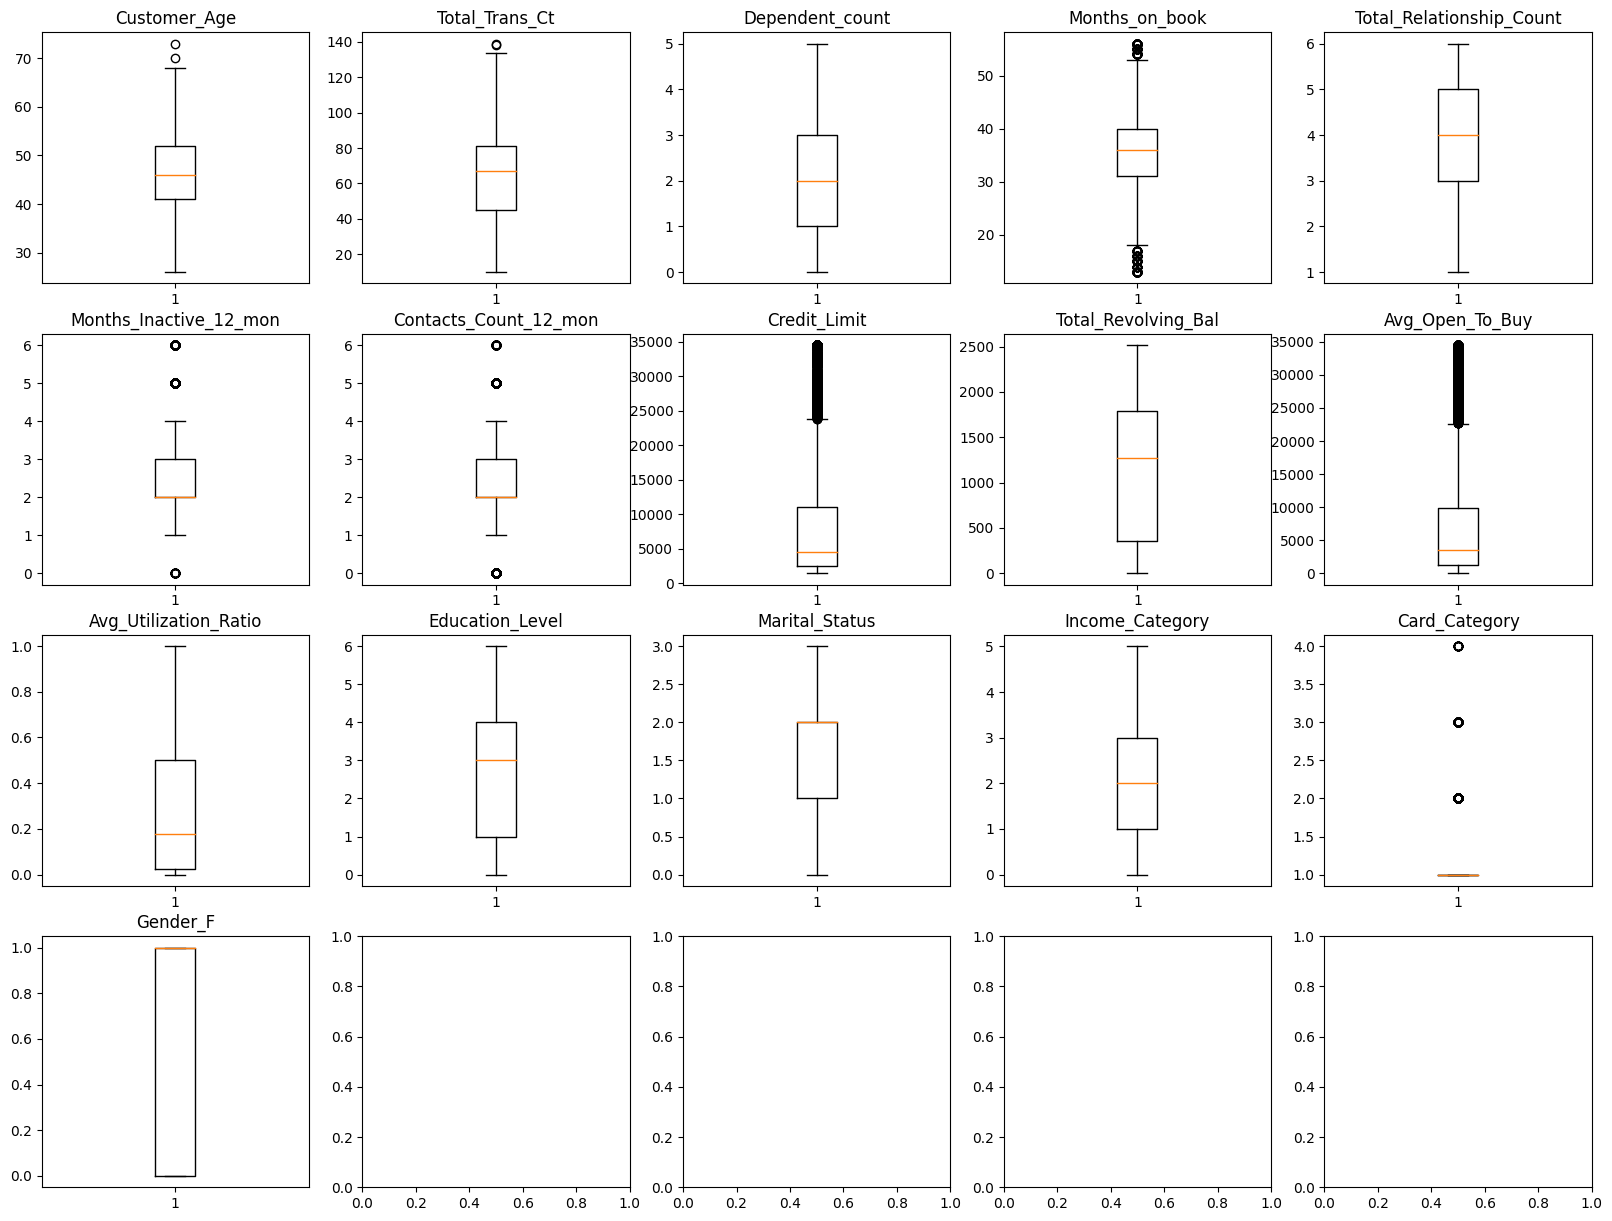

In [19]:
#Graficar Boxplot de Variables Importantes
df_campos_num = df[["Customer_Age","Total_Trans_Ct","Dependent_count","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Avg_Utilization_Ratio", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Gender_F"]] #>>>>>>>>>>>>>>>>>>>>HAY QUE AGREGAR MAS    // df.select_dtypes(include=np.number)  #

numcol = df_campos_num.columns.size

plt.subplots(nrows=4, ncols=5, figsize=(20,15))
for i in range(numcol):
  promedio = df_campos_num[df_campos_num.columns[i]].mean()
  plt.subplot(4,5,1+i)
  plt.boxplot(df_campos_num[df_campos_num.columns[i]]) #plt.hist(df_campos_num[df_campos_num.columns[i]], alpha = 0.5, color = 'b')
  plt.title(df_campos_num.columns[i])
  #plt.axvline(promedio, color='k', linestyle='dashed', linewidth=1)
  #min_ylim, max_ylim = plt.ylim()
  #plt.text(promedio*1.1, max_ylim*0.9, 'Media: {:.2f}'.format(promedio))



plt.show()


Después de observar los boxplots podemos observar lo siguiente:
1. Dimensiones con Outliers: Edad, Total de transacciones, Meses como cliente, Meses inactivo, Conteo de contactos, Límite de crédito
2. Tipo de Tarjeta de crédito tiene tantos del primer tipo y tan poco de los niveles elevados que sólo la tarjeta Blue no es considerada Outlier
3. En cuanto al Genero, están distribuidos uniformemente entre Masculino y Femenino.

Los puntos 1 y 2 implica que en las siguientes fases del proyecto será necesario hacer una limpieza más a fondo de los datos para remover los outliers

#### Histogramas

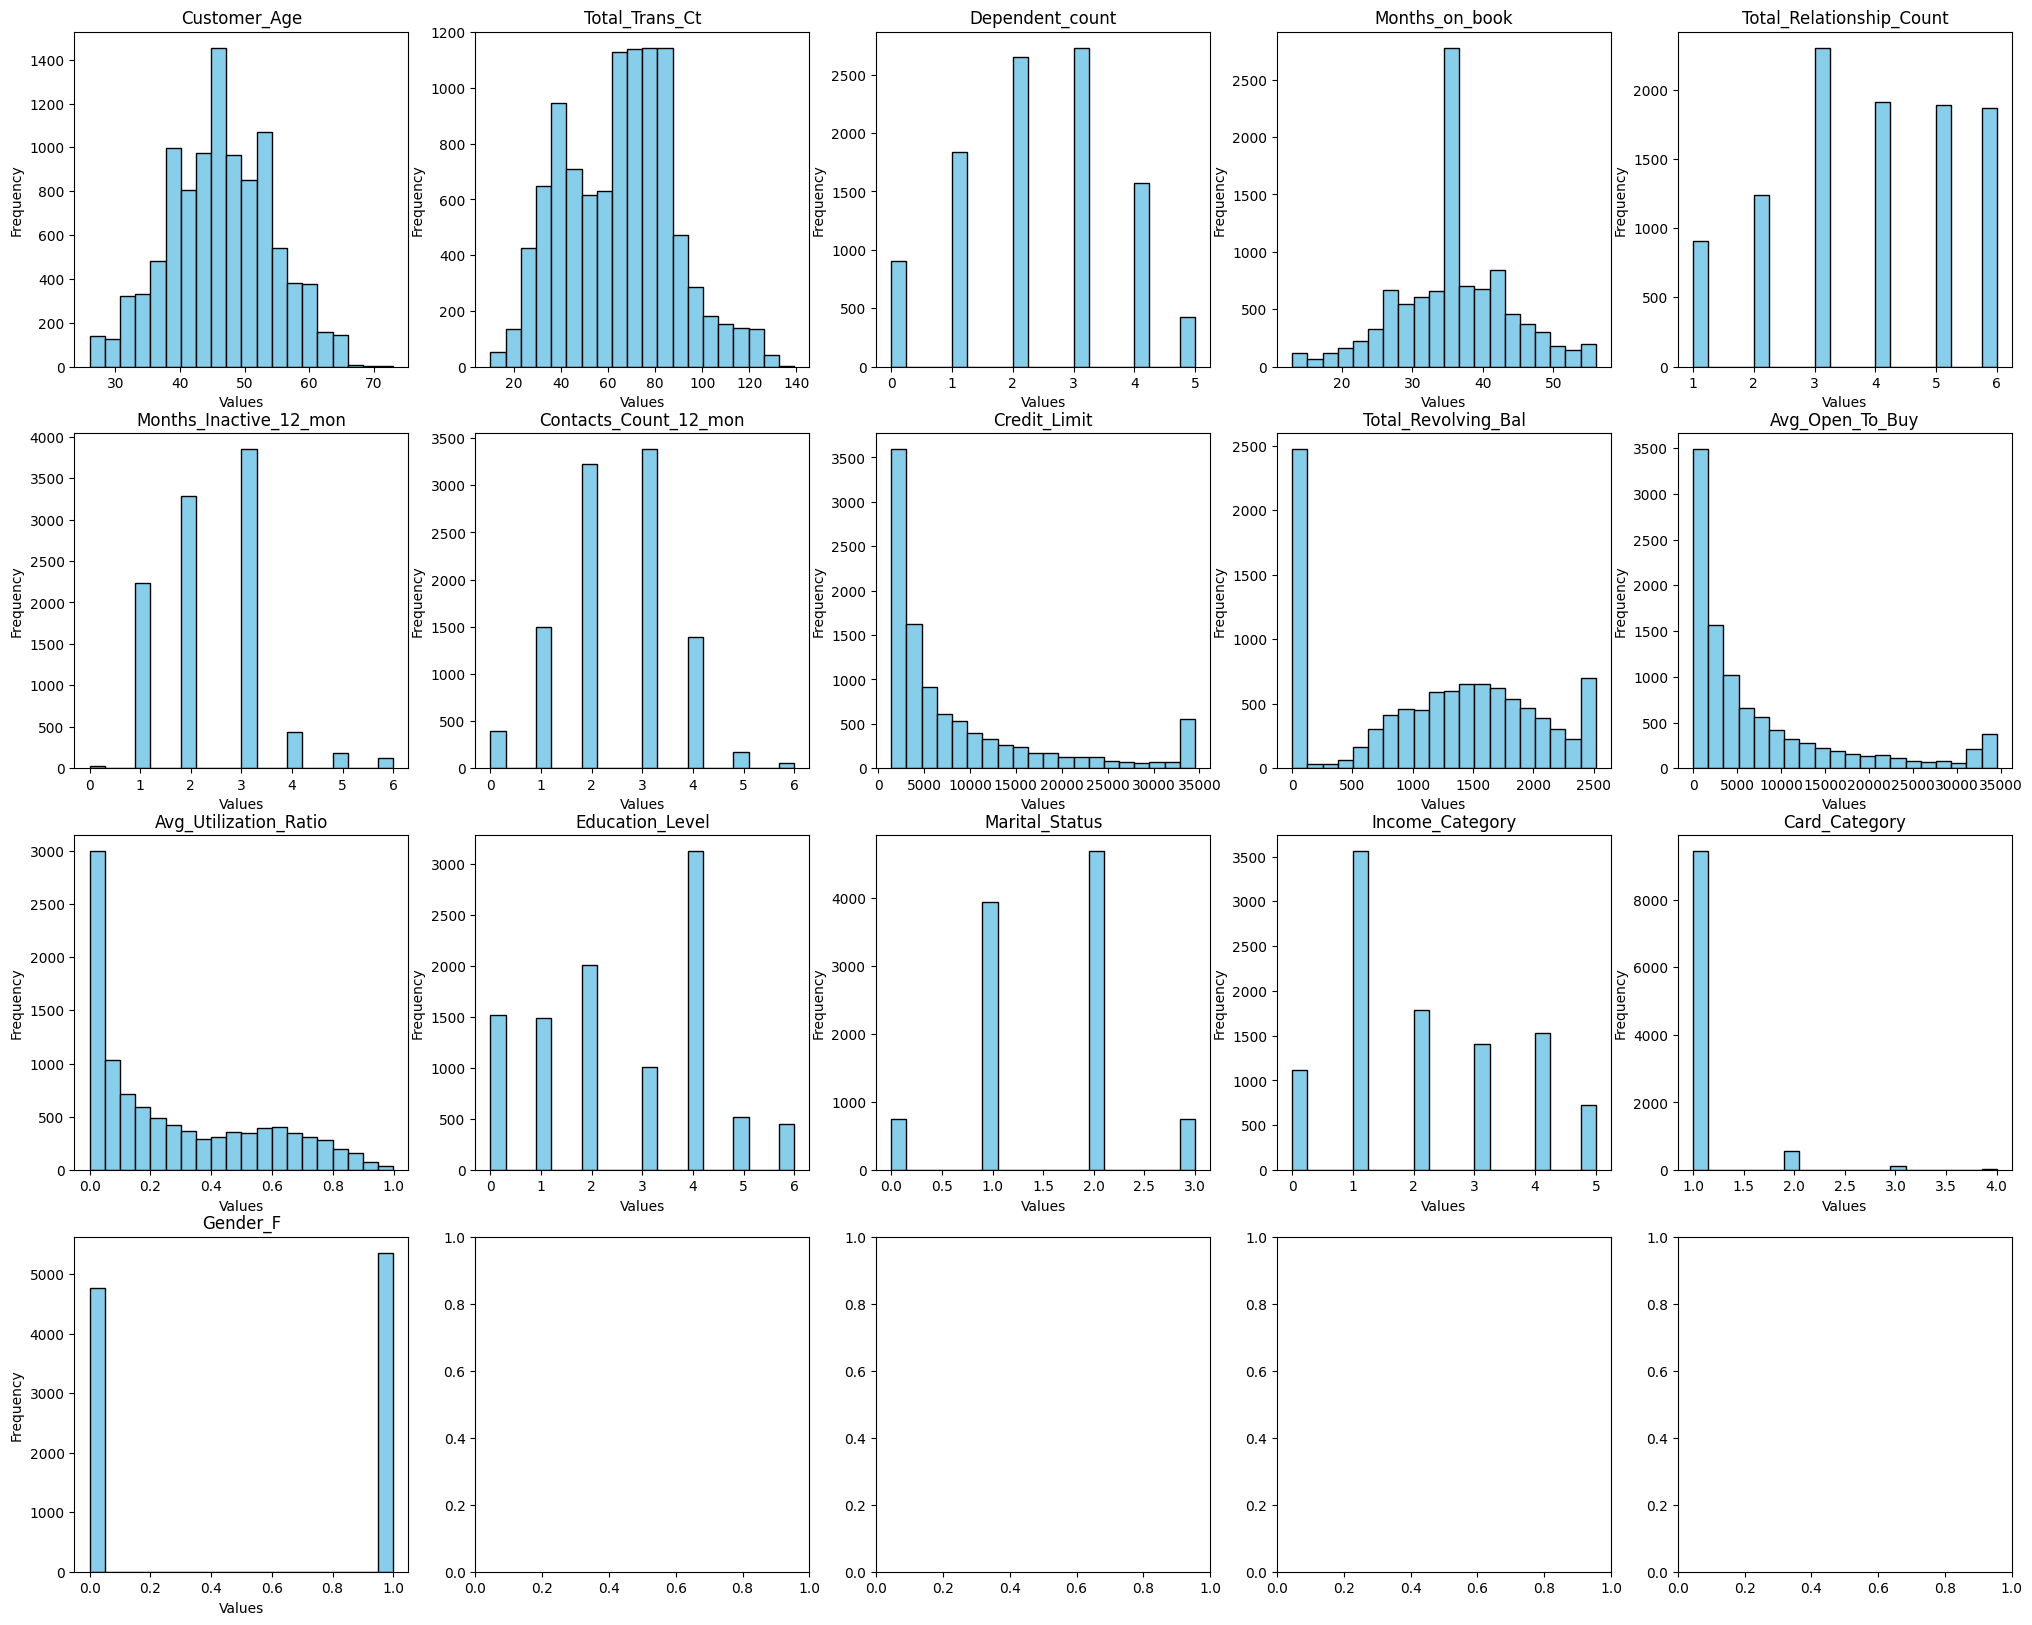

In [20]:
plt.subplots(nrows=4, ncols=5, figsize=(25,20))
for i in range(numcol):
  plt.subplot(4,5,1+i)
  plt.hist(df_campos_num[df_campos_num.columns[i]], bins=20, color='skyblue', edgecolor='black')
  plt.xlabel("Values")
  plt.ylabel("Frequency")
  plt.title(df_campos_num.columns[i])
  #plt.axvline(promedio, color='k', linestyle='dashed', linewidth=1)
  #min_ylim, max_ylim = plt.ylim()
  #plt.text(promedio*1.1, max_ylim*0.9, 'Media: {:.2f}'.format(promedio))



plt.show()

Después de observar los histogramas, podemos observar lo siguiente
1. La edad de los clientes, el conteo de transacciones, número de depndientes económicos y el número de meses como cliente siguen una distribución normal.
2. El Género está prácticamente dividido por igual entre Masculino y Femenino

### Análisis bi/multivariante

#### Matriz de Correlación

In [21]:
df_corr = df.copy()
df_corr['Attrition_Flag'] = df_corr['Attrition_Flag'].replace({'Attrited Customer' : 0, 'Existing Customer' : 1})
df_campos_num_corr = df_corr[["Attrition_Flag", "Customer_Age","Total_Trans_Ct","Dependent_count","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Avg_Utilization_Ratio", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Gender_F"]]


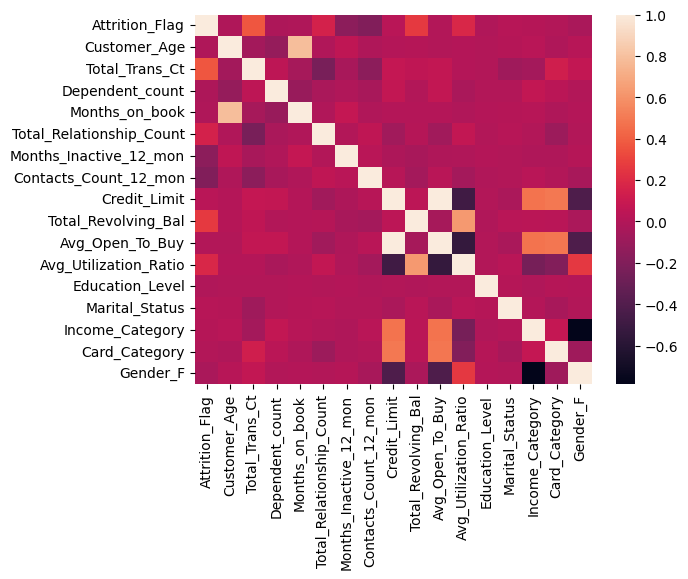

In [22]:
df_campos_num_corr.corr()
dataplot = sns.heatmap(df_campos_num_corr.corr(),xticklabels='auto')
plt.show()

De la matriz de correlación podemos observar que no hay una correlación muy directa entre nuestra variable de salida Attrition_Flag y el resto de las variables numéricas. Haremos un análisis con PCA para obtener más conclusiones.

#### Análisis de Componentes Principales (PCA)

In [23]:
#Normalizar Datos
scaler = MinMaxScaler()
df_campos_num_norm = pd.DataFrame(scaler.fit_transform(df_campos_num))
df_campos_num_norm.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.432467,0.425261,0.469241,0.533219,0.562516,0.390195,0.409220,0.217477,0.461984,0.216328,0.275169,0.433659,0.512195,0.417142,0.027879,0.529081
std,0.170571,0.181958,0.259782,0.185731,0.310882,0.168437,0.184371,0.274771,0.323793,0.263399,0.275967,0.283403,0.245936,0.294928,0.111261,0.499178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319149,0.271318,0.200000,0.418605,0.400000,0.333333,0.333333,0.033760,0.142630,0.038290,0.023023,0.166667,0.333333,0.200000,0.000000,0.000000
50%,0.425532,0.441860,0.400000,0.534884,0.600000,0.333333,0.333333,0.094042,0.506953,0.100571,0.176176,0.500000,0.666667,0.400000,0.000000,1.000000
75%,0.553191,0.550388,0.600000,0.627907,0.800000,0.500000,0.500000,0.291109,0.708780,0.285574,0.503504,0.666667,0.666667,0.600000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
pcs = PCA()

pcs.fit(df_campos_num_norm.dropna(axis=0))

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Standard deviation,0.605418,0.392429,0.332707,0.304953,0.283507,0.266235,0.246204,0.231606,0.189880,0.167138,0.163674,0.159001,0.132760,0.091550,0.081328,6.961843e-17
Proportion of variance,0.321966,0.135276,0.097235,0.081689,0.070603,0.062263,0.053246,0.047119,0.031671,0.024538,0.023532,0.022207,0.015482,0.007362,0.005810,4.257429e-33
Cumulative proportion,0.321966,0.457241,0.554476,0.636165,0.706768,0.769031,0.822277,0.869397,0.901067,0.925606,0.949138,0.971345,0.986828,0.994190,1.000000,1.000000e+00


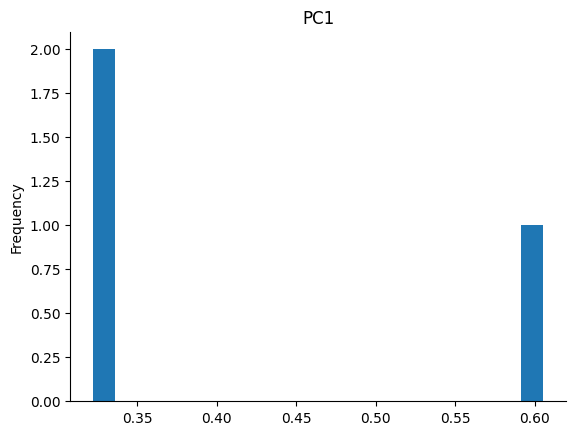

In [29]:
# @title PC1

from matplotlib import pyplot as plt
pcsSummary_df['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

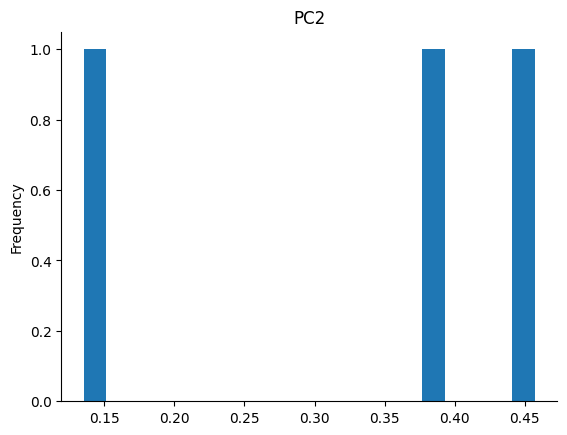

In [39]:
# @title PC2

from matplotlib import pyplot as plt
pcsSummary_df['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

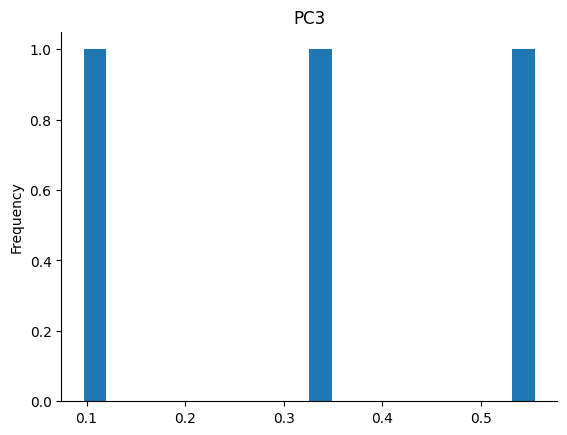

In [28]:
# @title PC3

from matplotlib import pyplot as plt
pcsSummary_df['PC3'].plot(kind='hist', bins=20, title='PC3')
plt.gca().spines[['top', 'right',]].set_visible(False)

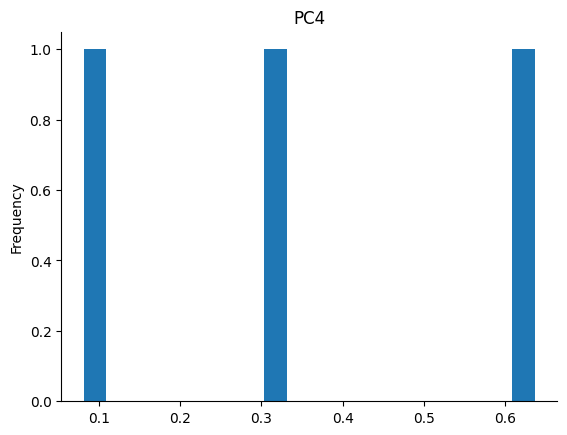

In [38]:
# @title PC4

from matplotlib import pyplot as plt
pcsSummary_df['PC4'].plot(kind='hist', bins=20, title='PC4')
plt.gca().spines[['top', 'right',]].set_visible(False)

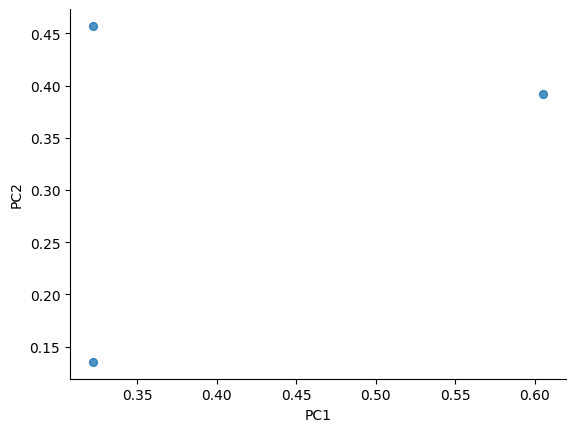

In [37]:
# @title PC1 vs PC2

from matplotlib import pyplot as plt
pcsSummary_df.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

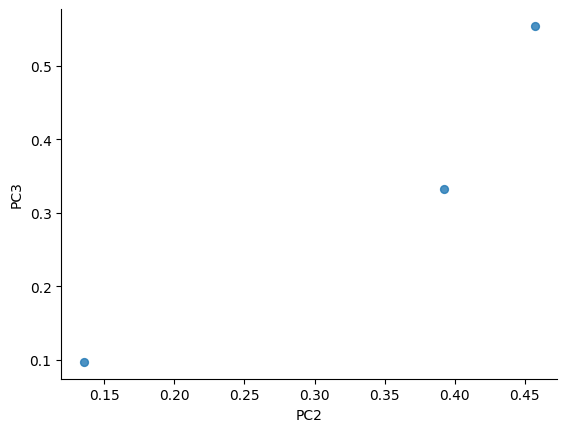

In [36]:
# @title PC2 vs PC3

from matplotlib import pyplot as plt
pcsSummary_df.plot(kind='scatter', x='PC2', y='PC3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

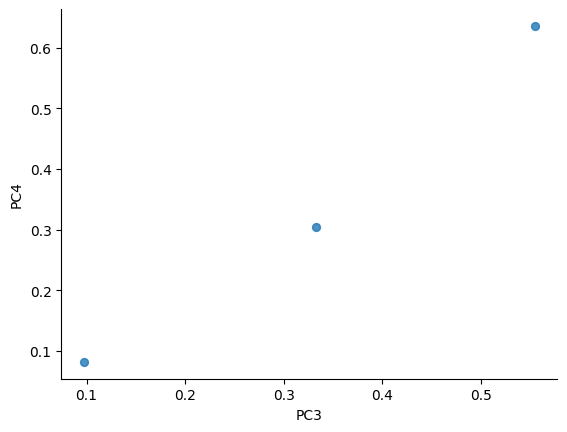

In [35]:
# @title PC3 vs PC4

from matplotlib import pyplot as plt
pcsSummary_df.plot(kind='scatter', x='PC3', y='PC4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

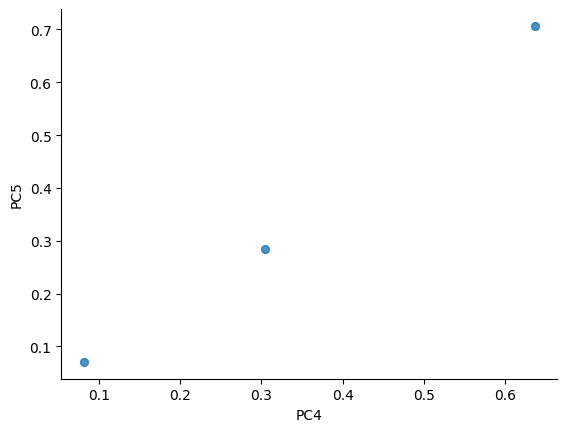

In [34]:
# @title PC4 vs PC5

from matplotlib import pyplot as plt
pcsSummary_df.plot(kind='scatter', x='PC4', y='PC5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

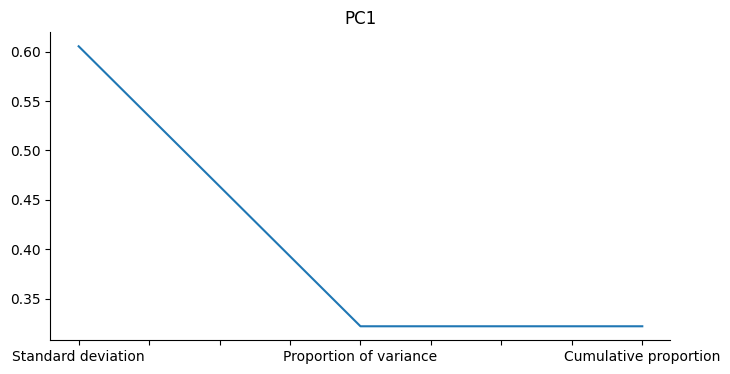

In [30]:
# @title PC1

from matplotlib import pyplot as plt
pcsSummary_df['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

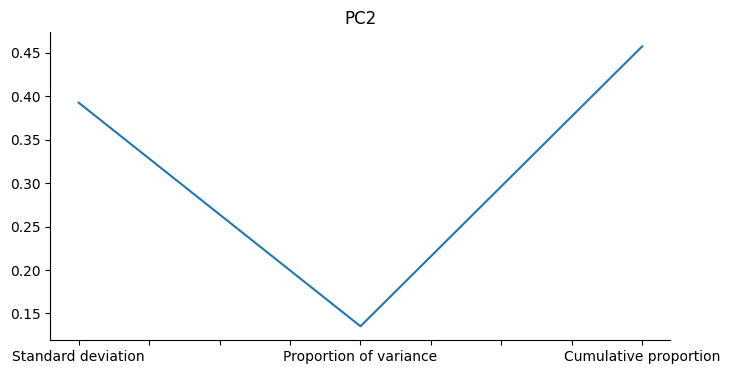

In [33]:
# @title PC2

from matplotlib import pyplot as plt
pcsSummary_df['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

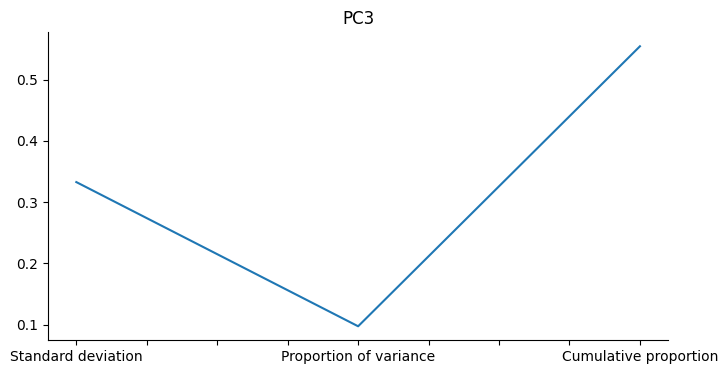

In [32]:
# @title PC3

from matplotlib import pyplot as plt
pcsSummary_df['PC3'].plot(kind='line', figsize=(8, 4), title='PC3')
plt.gca().spines[['top', 'right']].set_visible(False)

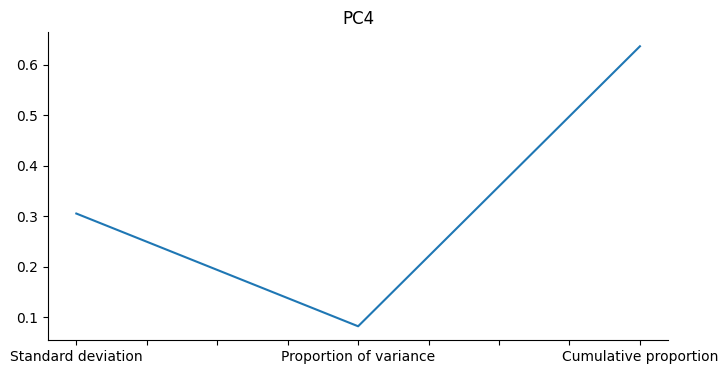

In [31]:
# @title PC4

from matplotlib import pyplot as plt
pcsSummary_df['PC4'].plot(kind='line', figsize=(8, 4), title='PC4')
plt.gca().spines[['top', 'right']].set_visible(False)

In [25]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns = pcsSummary_df.columns,
                                index = df_campos_num.columns
                                )
pcsComponents_df.iloc[:,:5]

pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(),
                                columns = pcsSummary_df.columns,
                                index = df_campos_num.columns
                                )

grafica = pcsComponents_dfX.iloc[:,:8]

grafica.style.background_gradient()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Customer_Age,-0.002310,-0.005638,-0.000931,0.004408,0.004196,0.323589,-0.085566,-0.567156
Total_Trans_Ct,-0.010484,0.029505,0.192109,-0.102349,-0.004486,-0.041280,0.088526,0.066421
Dependent_count,0.020394,0.040846,0.128494,0.006835,-0.001881,-0.866007,-0.089723,-0.456442
Months_on_book,0.000447,-0.002269,-0.002244,0.004141,0.011105,0.346521,-0.095847,-0.640375
Total_Relationship_Count,-0.017388,-0.134376,-0.542988,0.797496,-0.011933,-0.081095,0.056130,-0.025228
Months_Inactive_12_mon,-0.004250,0.013677,-0.021777,-0.012272,0.005334,0.039200,-0.010839,-0.089544
Contacts_Count_12_mon,0.014097,0.020027,-0.063064,0.038505,-0.007744,0.036413,-0.000273,0.050452
Credit_Limit,0.310979,0.203850,0.427234,0.359477,0.001858,0.070102,-0.020884,0.040428
Total_Revolving_Bal,-0.025561,-0.678334,0.469314,0.214518,0.007970,0.039744,0.001113,0.020054
Avg_Open_To_Buy,0.299910,0.244843,0.375240,0.328883,0.001200,0.064288,-0.020096,0.037284


In [26]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+100,y[i]+100)

### Analisis de la variable objetivo

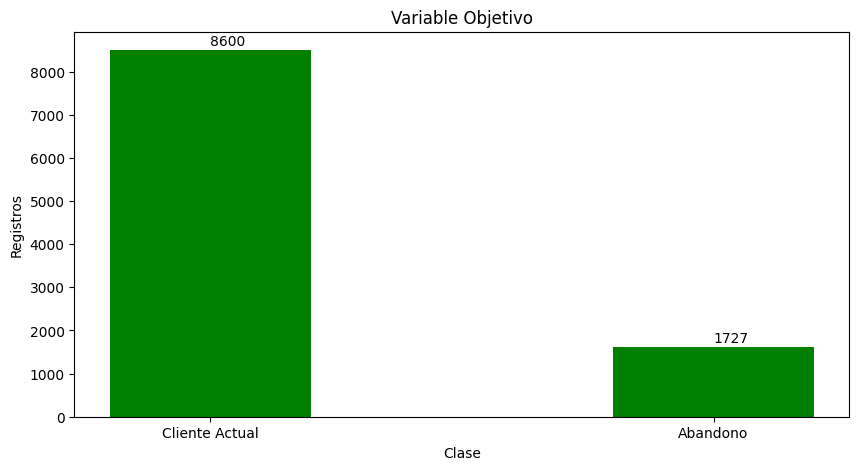

In [27]:
#ANALISIS DE VARIABLE OBJETIVO
df_y = df[["Attrition_Flag"]] #variable objetivo

clases = list(["Cliente Actual", "Abandono"])
values = list([
    len(df[df['Attrition_Flag'] == 'Existing Customer']),
    len(df[df['Attrition_Flag'] == 'Attrited Customer'])
    ])

fig = plt.figure(figsize = (10, 5))

plt.bar(clases, values, color ='green', width = 0.4)

addlabels(clases, values)




plt.xlabel("Clase")
plt.ylabel("Registros")
plt.title("Variable Objetivo")
plt.show()

Podemos observar que nuestra variable de salida no está balanceada, pues tenemos casi 5 veces más instancias de *cliente actual* comparado con *abandono* esto lo tomaremos en cuenta en las siguientes partes del proceso

### Conclusiones

Conclusiones de la Fase de "Preparación de los Datos" en el Contexto de la Metodología CRISP-ML:

La metodología CRISP-ML (Cross-Industry Standard Process for Data Mining - Machine Learning) proporciona un marco estructurado para la realización de proyectos de minería de datos y aprendizaje automático. En esta fase de preparación de datos, se siguieron los principios de CRISP-ML para garantizar una implementación sistemática y eficiente de las técnicas de preparación y análisis de datos.

Comprensión del Negocio y los Datos (Business Understanding & Data Understanding): Se realizó una comprensión profunda del problema de negocio y de los datos disponibles. Esto implicó entender el contexto del proyecto de Modelo de Machine Learning para la Predicción de Abandono de Tarjeta de Crédito y explorar el conjunto de datos para identificar sus características y peculiaridades.

Preparación de los Datos (Data Preparation): Durante esta fase, se llevaron a cabo diversas tareas de limpieza y preparación de los datos. Esto incluyó la identificación y manejo de valores faltantes, la transformación de variables categóricas en numéricas, el tratamiento de outliers y desequilibrios en las clases de la variable objetivo, así como la realización de análisis univariante y multivariante para comprender la distribución y la relación entre las variables.

Ingeniería de Características (Feature Engineering): Se aplicaron técnicas de ingeniería de características para crear nuevas variables que capturaran de manera más efectiva la información presente en los datos. Esto incluyó la generación de nuevas características, la discretización o binning de variables continuas, la codificación de variables categóricas, el escalamiento y la transformación de características para mejorar su representación y utilidad en el modelado.

Selección y Extracción de Características (Feature Selection & Extraction): Se utilizaron métodos de filtrado y técnicas de extracción de características para reducir la dimensionalidad del conjunto de datos y seleccionar las características más relevantes para el modelado. Esto incluyó el análisis de correlación, el umbral de varianza, el análisis de componentes principales (PCA) y otras técnicas para identificar y extraer características significativas.

Finalmente, se observa una implementación de las técnicas mencionadas, incluyendo la transformación de datos categóricos a numéricos, el análisis univariante y multivariante, así como la preparación de los datos para su posterior modelado. Cada paso está claramente documentado y justificado, lo que garantiza la reproducibilidad y comprensión del proceso realizado.


### Referencias
1. Brownlee, J. (2020, 17 agosto). *Ordinal and One-Hot Encodings for Categorical Data.* MachineLearningMastery.com. Recuperado el 4 de Mayo de 2024 https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
2. Crêteur, S. (2022, 16 diciembre). *Machine learning: one-hot encoding vs integer encoding*. Medium. Recuperado el 4 de Mayo de 2024 de https://medium.com/geekculture/
3. Galli, S. (2022). Python Feature Engineering Cookbook. Packt Publishing
4. Galarnyk, M. (2023, 26 julio). *Understanding boxplots.* Built In. Recuperado el 4 de Mayo de 2024 https://builtin.com/data-science/boxplot
5. GeeksforGeeks. (2023, 6 abril). *How to convert categorical string data into numeric in Python?* GeeksforGeeks. Recuperado el 4 de Mayo de 2024. https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/
6. GeeksforGeeks. (2024, 21 marzo). *How to create a seaborn correlation heatmap in Python?* GeeksforGeeks. Recuperado el 4 de Mayo de 2024. https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
7. GeeksforGeeks. (2024a, enero 9). *Plotting Histogram in Python using Matplotlib.* GeeksforGeeks. Recuperado el 5 de Mayo de 2024 https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
8. Jafari, R. (2022). *Hands-On Data Preprocessing in Python: Learn How to Effectively Prepare Data for Successful Data Analytics.* Packt.
9. Kumar Mukhiya, S., y Ahmed, U. (2020). *Hands-On Exploratory Data Analysis with Python*. Packt Publishing
machine-learning-one-hot-encoding-vs-integer-encoding-f180eb831cf1
10. Pulagam, S. (2021, 14 diciembre). *All you need to know about PCA technique in Machine Learning*. Medium. Recuperado el 3 de Mayo de 2024 de https://towardsdatascience.com/all-you-need-to-know-about-pca-technique-in-machine-learning-443b0c2be9a1
11. Saturn Cloud Blog. (2024, 5 enero). *How to Convert Categorical Data to Numerical Data with Pandas* Recuperado el 4 de Mayo de 2024 https://saturncloud.io/blog/how-to-convert-categorical-data-to-numerical-data-with-pandas/
12. Visengeriyeva, L., Kammer, A., Bär, I., Kniesz, A., y Plöd, M. (2023). CRISP-ML(Q). The ML Lifecycle Process. MLOps. INNOQ